# Lección 2. Regresión Lineal Simple

Ejecuta la primera celda de código si no está visible la presentación en Genially.

In [6]:
import IPython
IPython.display.IFrame('https://view.genial.ly/62b44dbd66a53e0018b10e40',900,500)

# Bibliotecas

Recuerda, una biblioteca es un conjunto de funciones predefinidas que podemos usar en nuestros programas. En esta lección vamos a usar la biblioteca NumPy y Matplotlib.

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays.

In [2]:
# Importamos las bibliotecas numpy y matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Datos

En esta ocasión, tenemos datos estadísticos de 12 estudiantes que corresponden a sus notas de físicas y matemáticas



In [3]:
x = [2,3,4,4,5,6,6,7,7,8,10,10] # notas de matemáticas en variable x
y = [1,3,2,4,4,4,6,4,6,7,9,10] # notas de física en variable y

# Nube de puntos

Una vez disponemos de los datos, dibujamos la nube de puntos. Esto lo hacemos mediante la función "scatter" de la biblioteca matplotlib. Debemos pasarle los datos por parámetro. Podemos nombrar los ejes con las funciones xlabel e ylabel.

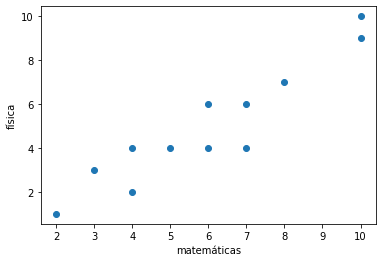

In [5]:
# Creamos el gráfico, primero damos nombre a los ejes. X será matemáticas, Y será física
plt.xlabel('matemáticas')
plt.ylabel("física")
# Volcamos los datos en la gráfica con la función scatter
plt.scatter(x,y);

Podemos observar a simple vista que existe una correlación entre la nota de física y la nota de matemáticas de cada estudiante. Cuanto mejor es la nota de matemáticas de un alumno, mejor es su nota de física. 

# Centro de gravedad de una distribución bidimensional.

Recuerda que la media de una variable X es $\bar{x} = \frac {\sum{x_i}} {n} $

Calculamos la media de la variable x y la media de la variable y. Esto nos dará un punto $(\bar{x},\bar{y})$ que será el centro de gravedad de nuestra distribución bidimensional.

In [9]:
media_x = np.mean(x)
media_y = np.mean(y)
print("El centro de gravedad es: (", media_x , "," , media_y, ")")

El centro de gravedad es: ( 6.0 , 5.0 )


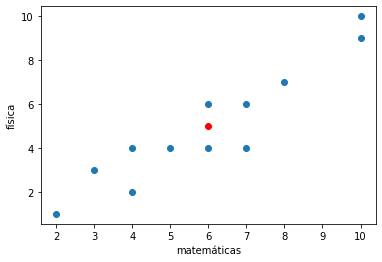

In [10]:
#Volvemos a mostrar la nube de puntos
plt.scatter(x,y)
plt.xlabel('matemáticas')
plt.ylabel("física")

#Podemos pintar sobre nuestra nube de puntos el centro de gravedad mediante la función plot y asignarle el color rojo
plt.plot(media_x,media_y,marker="o", color="red")
plt.show()

# Covarianza

La covarianza es una medida de variación conjunta de dos variables respecto a sus medias. Sirve para determinar si existe cierto grado de dependencia entre ambas variables o no. 

La covarianza de dos variables, x e y, se calcula: $\sigma_{xy} = \frac {\sum{ ({x_i}-\bar{x})({y_i}-\bar{y}) }} {n} = \frac {\sum{ {x_i} {y_i} }} {n} - \bar{x} \bar{y} $

En numpy, disponemos de la función para calcular la covarianza np.cov(x, y)

La función devuelve una matriz de 4 valores, los cuales son, por posición:

[0,0] covarianza (x,x) | [0,1] covazianza (x,y)

[1,0] covarianza (y,x) | [1,1] covarianza (y,y)

In [13]:
# Calculamos la matriz de covarianzas. El parámetro bias=True sirve para indicar a la función que calcule la covarianza sobre N
matriz_cov = np.cov(x,y, bias=True)
print("Matriz de covarianzas")
print(matriz_cov)

print("Covarianza de xy es", matriz_cov[0,1])

Matriz de covarianzas
[[6.         5.91666667]
 [5.91666667 6.66666667]]
Covarianza de xy es 5.916666666666666


# Correlación 

El valor de correlación entre dos variables de una distribución bidimensiaonal viene dado por la expresión:

$r = \frac {\sigma_{xy}} {\sigma_x \sigma_y}$

El valor de r está comprendido entre -1 y 1:
<ul>
    <li>Si la correlación es perfecta, esto es, sus puntos están alineados, entonces $|r| = 1$</li>
    <li>Si la correlación es fuerte, $|r|$ es próximo a 1.
    <li>Si la correlación es débil, $|r|$ es próximo a 0.
</ul>

In [16]:
# Calculamos la correlación entre las variables x e y.
# Primero calculamos la covarianza. Recuerda que la función nos devuelve la matriz, nos quedamos con la posición [0,1]
covXY=np.cov(x,y, bias=True)[0,1]

# Calculamos las desviaciones típicas de x e y.
desviacionX = np.std(x)
desviacionY = np.std(y)


# Calculamos la correlación 
r= covXY / (desviacionX * desviacionY)

# Redondeamos con 2 decimales
r = round (r, 2)
print("La correlación de las dos variables es: ",r)

La correlación de las dos variables es:  0.94


# Regresión Lineal Simple

Una rama de la inteligencia artificial y del aprendizaje automático trata de construir modelos basados en unos datos observados para realizar estimaciones. Una de estas técnicas es la Regresión Lineal.

Para nuestros datos de ejemplo (notas de matemáticas y física) podemos construir un modelo y hacer estimaciones para preguntarnos ¿cuál será la nota en física si el alumno tiene un 6,5 en matemáticas?

Podríamos trazar a ojo una recta que pase lo más cerca posible de todos los puntos. Vamos a trazar sobre nuestra nube de puntos una recta con origen en el punto (0,1) y fin en el punto (10,8) mediante la función plot()

Para pintar la recta, la función plot debe recibir dos puntos, origen y fin, de la siguiente manera:
plot( [origenX, finX], [origenY, finY], color línea)


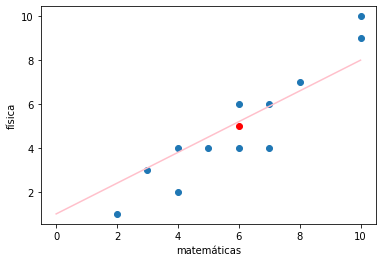

In [25]:
# Volvemos a mostrar la nube de puntos
plt.scatter(x,y)
plt.xlabel('matemáticas')
plt.ylabel("física")

# Pintamos el centro de gravedad
plt.plot(media_x,media_y,marker="o", color="red")

# Pintamos la recta
plt.plot([0,10],[1,8], color="pink")
plt.show()

# Recta de regresión: Método de mínimos cuadrados 

Observamos que la recta dibujada no pasa por el centro de gravedad y quedan muchos puntos por debajo y alejado de la recta. Gracias a la estadística y a las matemáticas, podemos encontrar la recta que mejor se ajusta a los datos. Esto, unido a la capacidad de computación de los ordenadores y a lenguajes como Python, nos permite realizar modelos sobre miles de observaciones que de otra forma sería imposible de analizar.  

Recordemos que la ecuación de la recta es $y = A + Bx$

De entre todas las rectas posibles ¿cómo podemos saber cuál es la que mejor representa los datos?  

Podemos calcular la distancia entre cada punto y una posible recta. Por ejemplo, el punto (10,9), donde el alumno tiene un 10 en matemáticas y un 9 en física. Sin embargo, la recta mostrada anteriormente prevé que para un 10 en la coordenada X, corresponde un 8 en la coordenada Y. Por lo tanto, la distancia, o el error, entre dichos puntos es d = 9-8 = 1.

Estos errores pueden ser positivos o negativos, dependiendo de si el punto está por debajo o por encima de la recta. Para eliminar el carácter del signo, se elevan todas las distancias al cuadrado y posteriormente se suman. Esto es lo que se denomina error del modelo: $error = \sum{d_i^2}$. 

De entre todas las rectas posibles, nos quedaremos con la recta donde el error sea mínimo. Esto es lo que se denomina Método de los mínimos cuadrados. 

¿Pero debemos a calcular todas las rectas? Evidentemente no. La recta que hace mínimo el error, llamada recta de regresión de Y sobre X, es: 

$y = \bar{y} + \frac{\sigma_{xy}} {\sigma_x^2} (x-\bar{x})  $


Vamos a calcular los valores de y para x=2 (primer valor x), x=6 (media de x) y x=10 (último valor de x)

In [32]:
#Covarianza xy
covxy = np.cov(x,y, bias=True)[0,1]

#Varianza de x
varx = np.var(x)

#media de x
meanx = np.mean(x)

#media de y
meany = np.mean(y)

#Calculamos y para x=2
y1 = meany + (covxy / varx)*(2-meanx)
print("Valor de y correspondiente a x=2: ", round(y1, 2))


#Calculamos y para x=6
y2 = meany + (covxy / varx)*(6-meanx)
print("Valor de y correspondiente a x=6: ", y2)


#Calculamos y para x=10
y3 = meany + (covxy / varx)*(10-meanx)
print("Valor de y correspondiente a x=10: ", round(y3, 2))


Valor de y correspondiente a x=2:  1.06
Valor de y correspondiente a x=6:  5.0
Valor de y correspondiente a x=10:  8.94


Podemos observar que el valor calculado para y siendo x=6 (media de x), coincide con la media de y, dando así la recta su paso por el centro de gravedad.

Ahora podemos pintar la recta entre los puntos (2, 1.06) (10, 8.94)

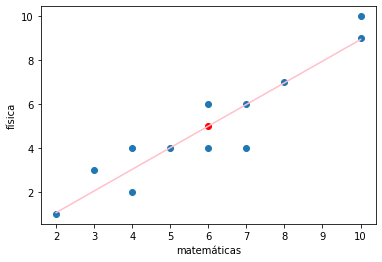

In [33]:
# Volvemos a mostrar la nube de puntos
plt.scatter(x,y)
plt.xlabel('matemáticas')
plt.ylabel("física")

# Pintamos centro de gravedad mediante la función plot y asignamos color rojo
plt.plot(media_x,media_y,marker="o", color="red")


# Pintamos la recta de regresión
plt.plot([2,10],[1.06,8.94], color="pink")
plt.show()

# Regresión Lineal haciendo uso de NumPy

Evidentemente, disponemos de funciones en la biblioteca para hacer lo mismo de forma más directa.

Recordemos que la ecuación de la recta es $y = A + Bx$

A = Término independiente

B = Pendiente

La función de la biblioteca numpy.polyfit nos va a calcular tales valores haciendo mínimo el error.

Pendiente:  0.9861111111111112
Término independiente:  -0.9166666666666651
Ecuación de la recta:  
0.9861 x - 0.9167
Valores de y correspondientes a x=2, x=10:  [1.05555556 8.94444444]


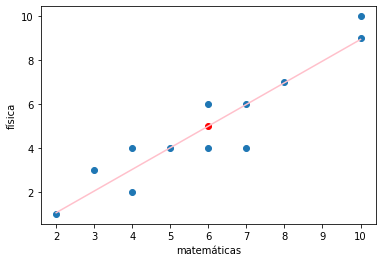

In [35]:
# Calculamos la pendiente y término independiente con la función polyfit. Pasamos como parámetros los datos. 
linear_model=np.polyfit(x,y,1)

# La función polyfit nos devuelve un vector, en la posición 0 almacena la pendiente, en la posición 1 el término independiente
print("Pendiente: ",linear_model[0])
print("Término independiente: ", linear_model[1])

# Establecemos el modelo de regresión lineal con los valores calculados.
linear_model_fn=np.poly1d(linear_model)
print("Ecuación de la recta:", linear_model_fn)

#Las coordenadas de x en origen y fin de la recta que vamos a pintar son x=2, x=10, correspondientes a primer y último valor
valores_x=[2,10]

#Gracias al modelo calculado, obtenemos los puntos de y correspondientes para valores x=2, x=10
valores_y =  linear_model_fn(valores_x)
print("Valores de y correspondientes a x=2, x=10: ", valores_y)


# Pintamos la gráfica con los datos
plt.scatter(x,y)
plt.xlabel("matemáticas")
plt.ylabel("física")
plt.plot(media_x,media_y,marker="o", color="red")

# Pintamos la recta calculada según el modelo
plt.plot(valores_x, valores_y, color="pink")
plt.show()

# Estimaciones

Si un alumno obtiene un 6.5 en matemáticas, ¿qué nota en física podemos predecir con nuestro modelo?

Podemos usar la ecuación de la recta haciendo uso del término independiente y pendiente calculados anteriormente: $y = -0.9167 + 0.9861 x$ 

Para $x=6.5$ obtenemos que $y=5.49$ 

O hacemos uso del modelo creado anteriormente.

In [37]:
nota_mates = 6.5
nota_fisica = linear_model_fn(nota_mates)
nota_fisica = round(nota_fisica, 2)
print("Si tengo un 6,5 en matemáticas, la previsión es que saque en física", nota_fisica)

Si tengo un 6,5 en matemáticas, la previsión es que saque en física 5.49


# Para practicar y evaluar lo aprendido

Visualiza la presentación (ejecuta la celda si no está visible) y responde al Quiz ayudándote de la programación en Python

In [8]:
import IPython
IPython.display.IFrame('https://view.genial.ly/630fa9f808445a0019682c93',900,500)

In [5]:
# Importamos el dataset, que pertenece a la biblioteca Scikit-Learn
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
x=X[:,0]

# Variable objetivo 'y' nivel de progresión de diabetes
print("Tamaño de y:", y.shape)

# Variable 'x' almacena índice masa corporal
print("Tamaño variable x:", x.shape)

# Sigue el programa a partir de aquí

Tamaño de y: (442,)
Tamaño variable x: (442,)
